In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = r"C:\Users\raksh\Downloads\Global_Superstore2.csv"
df = pd.read_csv(file_path, encoding="latin1")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
df.shape

(51290, 24)

In [7]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [8]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("-", "_")
)

In [9]:
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [10]:
df["order_date"] = pd.to_datetime(df["order_date"], format="%d-%m-%Y")
df["ship_date"] = pd.to_datetime(df["ship_date"], format="%d-%m-%Y")

In [11]:
df.drop(columns=["row_id","postal_code"], inplace=True)

In [12]:
df["shipping_days"] = (df["ship_date"] - df["order_date"]).dt.days

In [13]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,shipping_days
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,0
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,1
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,1


In [14]:
df["profit_margin"] = np.where(
    df["sales"] !=0,
    df["profit"]/df["sales"],0
)

In [15]:
df[df["profit"]<0].head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,shipping_days,profit_margin
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2,-0.077847
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2,-0.033376
9,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,United States,...,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical,3,-0.433333
30,US-2011-128776,2011-12-28,2011-12-30,Second Class,RR-19525,Rick Reed,Corporate,Santo Domingo,Santo Domingo,Dominican Republic,...,Phones,"Samsung Smart Phone, VoIP",1696.640,5,0.2,-148.4600,704.06,Critical,2,-0.087502
32,CA-2012-139731,2012-10-15,2012-10-15,Same Day,JE-15745,Joel Eaton,Consumer,Amarillo,Texas,United States,...,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.430,5,0.3,-350.4900,690.42,High,0,-0.142857


In [16]:
df["discount"].describe()

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: discount, dtype: float64

In [17]:
fact_sales = df[
    [
        "order_id",
        "order_date",
        "ship_date",
        "customer_id",
        "product_id",
        "market",
        "region",
        "ship_mode",
        "order_priority",
        "sales",
        "quantity",
        "discount",
        "profit",
        "shipping_cost",
        "shipping_days",
        "profit_margin"
    ]
]


In [18]:
dim_customers = df[
    [
        "customer_id",
        "customer_name",
        "segment",
        "city",
        "state",
        "country",
        "market"
    ]
].drop_duplicates()


In [19]:
dim_products = df[
    [
        "product_id",
        "product_name",
        "category",
        "sub_category"
    ]
].drop_duplicates()


In [20]:
dim_dates = pd.DataFrame({
    "date": pd.date_range(
        start=df["order_date"].min(),
        end=df["order_date"].max()
    )
})

dim_dates["year"] = dim_dates["date"].dt.year
dim_dates["month"] = dim_dates["date"].dt.month
dim_dates["month_name"] = dim_dates["date"].dt.month_name()
dim_dates["quarter"] = dim_dates["date"].dt.to_period("Q").astype(str)


In [21]:
fact_sales.to_csv("fact_sales.csv", index=False)
dim_customers.to_csv("dim_customers.csv", index=False)
dim_products.to_csv("dim_products.csv", index=False)
dim_dates.to_csv("dim_dates.csv", index=False)


In [22]:
df = pd.read_csv("fact_sales.csv", parse_dates=["order_date"])
df.head()

,order_id,order_date,ship_date,customer_id,product_id,market,region,ship_mode,order_priority,sales,quantity,discount,profit,shipping_cost,shipping_days,profit_margin
0,CA-2012-124891,2012-07-31,2012-07-31,RH-19495,TEC-AC-10003033,US,East,Same Day,Critical,2309.650,7,0.0,762.1845,933.57,0,0.330000
1,IN-2013-77878,2013-02-05,2013-02-07,JR-16210,FUR-CH-10003950,APAC,Oceania,Second Class,Critical,3709.395,9,0.1,-288.7650,923.63,2,-0.077847
2,IN-2013-71249,2013-10-17,2013-10-18,CR-12730,TEC-PH-10004664,APAC,Oceania,First Class,Medium,5175.171,9,0.1,919.9710,915.49,1,0.177766
3,ES-2013-1579342,2013-01-28,2013-01-30,KM-16375,TEC-PH-10004583,EU,Central,First Class,Medium,2892.510,5,0.1,-96.5400,910.16,2,-0.033376
4,SG-2013-4320,2013-11-05,2013-11-06,RH-9495,TEC-SHA-10000501,Africa,Africa,Same Day,Critical,2832.960,8,0.0,311.5200,903.04,1,0.109963


In [23]:
monthly_sales = (
    df.groupby(pd.Grouper(key="order_date", freq="M"))["sales"]
    .sum()
    .reset_index()
)

monthly_sales.columns = ["date", "sales"]
monthly_sales.head()


C:\Users\raksh\AppData\Local\Temp\ipykernel_15560\3211012531.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="order_date", freq="M"))["sales"]


,date,sales
0,2011-01-31,98898.48886
1,2011-02-28,91152.15698
2,2011-03-31,145729.36736
3,2011-04-30,116915.76418
4,2011-05-31,146747.83610


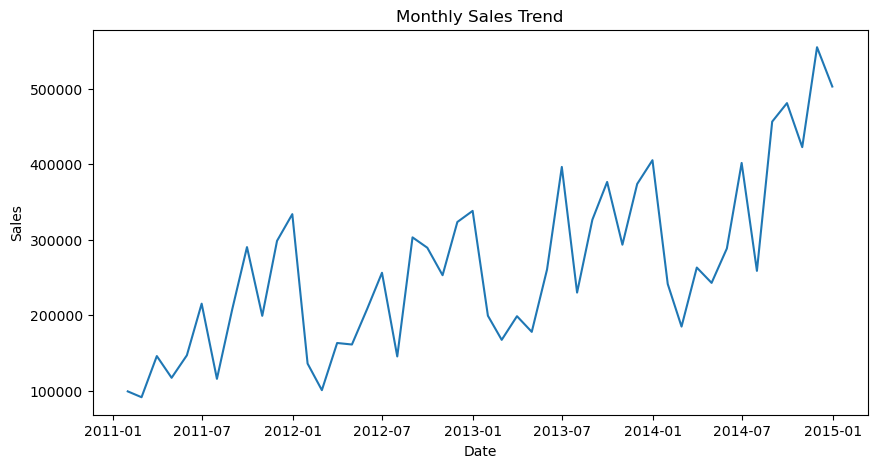

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["date"], monthly_sales["sales"])
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


In [27]:
monthly_sales["forecast"] = monthly_sales["sales"].rolling(window=3).mean()

In [28]:
last_date = monthly_sales["date"].max()
future_dates = pd.date_range(last_date, periods=4, freq="M")[1:]

forecast_value = monthly_sales["sales"].tail(3).mean()

forecast_df = pd.DataFrame({
    "date": future_dates,
    "forecast_sales": forecast_value
})

forecast_df


C:\Users\raksh\AppData\Local\Temp\ipykernel_15560\826359460.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(last_date, periods=4, freq="M")[1:]


,date,forecast_sales
0,2015-01-31,493729.783213
1,2015-02-28,493729.783213
2,2015-03-31,493729.783213


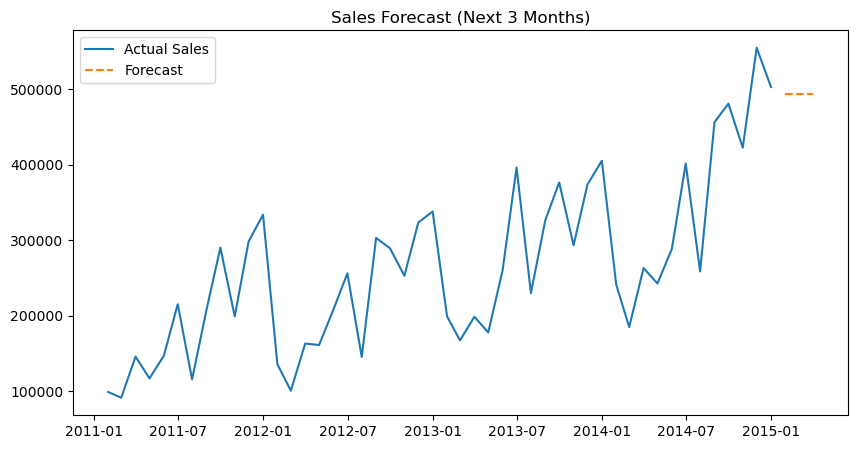

In [29]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["date"], monthly_sales["sales"], label="Actual Sales")
plt.plot(forecast_df["date"], forecast_df["forecast_sales"], 
         linestyle="--", label="Forecast")
plt.legend()
plt.title("Sales Forecast (Next 3 Months)")
plt.show()
